# Face Detection Using OpenCv 

In [1]:
# Importing Libraries

import numpy as np 
import pandas as pd 

#Visiulazation
import matplotlib.pyplot as plt
%matplotlib inline

#image processing
import cv2

In [2]:
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
#load test iamge
test1 = cv2.imread('footballTeam.jpg')

#convert the test image to gray image as opencv face detector expects gray images
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

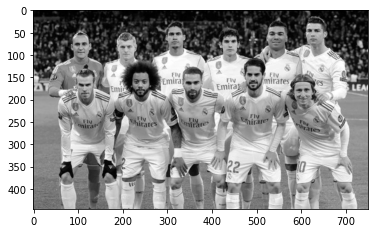

In [4]:
#if you have matplotlib installed then 
plt.imshow(gray_img, cmap='gray')

# or display the gray image using OpenCV
# cv2.imshow('Test Imag', gray_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [5]:
# Using the Haar Cascade which comes in-built with OpenCv package
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
face_detector

< cv2.CascadeClassifier 00000247FB1038F0>

In [6]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.2):
    #just making a copy of image passed, so that passed image is not changed
    img_copy = colored_img.copy()
    
    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);
    
    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    #print the number of faces found
    print('Faces found: ', len(faces))
        
    return img_copy

Faces found:  11


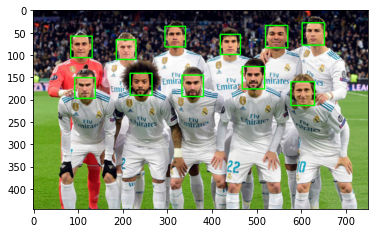

In [7]:
#load another image
sample = cv2.imread('footballTeam.jpg')

#call our function to detect faces
faces_detected_img = detect_faces(face_detector, sample)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

Actual Faces: 15
Faces found:  12


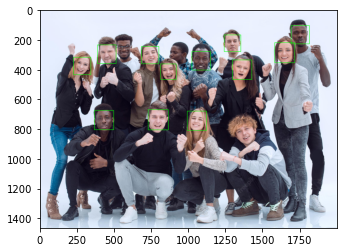

In [8]:
#load another image
test1 = cv2.imread('test1.jpg')

af1 = 15 # Number of actual faces
print('Actual Faces:', af1)

#call our function to detect faces
faces_detected_img = detect_faces(face_detector, test1)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

The model detected 12 Faces correctly and failed to detect 3 faces i.e. False Negative = 3

Actual Faces: 15
Faces found:  15


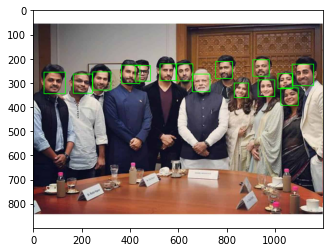

In [9]:
#load another image
test2 = cv2.imread('test2.jpg')

af2 = 15 # Number of actual faces
print('Actual Faces:', af2)

#call our function to detect faces
faces_detected_img = detect_faces(face_detector, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

The model detected each face with 100% accuracy in this case

Actual Faces: 16
Faces found:  17


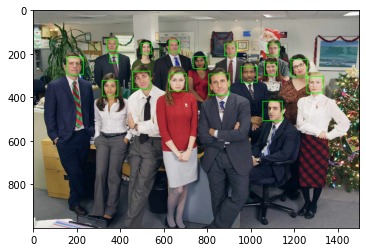

In [10]:
#load another image
test3 = cv2.imread('test3.jpg')

af3 = 16 # Number of actual faces
print('Actual Faces:', af3)

#call our function to detect faces
faces_detected_img = detect_faces(face_detector, test3)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

The model detected 17 Faces with 16 True Positives and 1 False Positive

In [11]:
# Calculating Accuracy

# Accuracy = (TP + TN)/ (TP + TN + FP + FN)
# TP = True Positive; TN = True Negative; FP = False Positive; FN = False Negative

Accuracy = ((43)/(43 + 1 + 3)) * 100 # TP = 12 + 15 + 16; FP = 1; FN = 3 (Considering 3 test cases)
print('Accuracy =', Accuracy)

Accuracy = 91.48936170212765
